In [30]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import pandas as pd
import bioread
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.signal import find_peaks

In [38]:
def FPM (nombreArchivo):
    # Leer el archivo de datos
    ECG = bioread.read_file (nombreArchivo)
    t = ECG.time_index.T

    señal = ECG.channels[0].data
    Fs = ECG.channels[0].samples_per_second
    N = len(señal)
    n = np.arange (N)



    # Elimino tendencia -----------------------------------------------------------------------------
    A3 = np.arange(0,N,250) #arreglo
    B3 = tuple(A3) #tupla
    señal_sin_tendencia = signal.detrend(señal,bp=A3)
    #------------------------------------------------------------------------------------------------



    M = np.arange (2,6,1) #vector de ordenes de los FPM
    k = np.arange (0,30,dtype=np.float64)

    resp = np.empty ((N,len(M)))

    for i,N1 in enumerate (M):
        FPM = np.piecewise (k,(0<=k)&(k<=N1-1),[1/N1,0])
        resp[:,i] = np.convolve (señal_sin_tendencia,FPM,"same")


    peaks_max = find_peaks (señal_sin_tendencia,distance=500)[0]
    peaks_min = find_peaks (-señal_sin_tendencia,distance=500)[0]

    A_max_signal = np.mean (señal_sin_tendencia[peaks_max])
    A_min_signal = np.mean (señal_sin_tendencia[peaks_min])

    aux_max = np.zeros ((len(M),len(peaks_max)))
    aux_min = np.zeros ((len(M),len(peaks_min))) 

    for i in range  (len(M)):
        peaks2_max = find_peaks (resp[:,i],distance=500)[0]
        peaks2_min = find_peaks (-resp[:,i],distance=500)[0]
        aux_max [i,:] = resp [peaks2_max,i]
        aux_min [i,:] = resp [peaks2_min,i]
    A_max = np.mean (aux_max,axis=1) ; A_min = np.mean (aux_min,axis=1)
    A_signal = A_max_signal - A_min_signal ; A_signal_filtr = A_max - A_min
    Atenuac = np.round ((A_signal - A_signal_filtr)*100/A_signal,1) #porcentaje de atencuación


    max_noise = np.zeros (len(M)) ; min_noise = np.zeros (len(M))
    for i in range (len(M)):
        max_noise[i] = max(resp[400:600,i]) #ruido uniforme en toda la señal
        min_noise[i] = min(resp[400:600,i])


    A_noise = max_noise - min_noise
    SNR = A_signal_filtr / A_noise
    SNR_dB = 20*np.log (A_signal_filtr/A_noise)

    for i in range (len(M)):
        if (Atenuac[i] < 20)&(SNR_dB[i] == max(SNR_dB)):
            print (f"El filtro de orden {M[i]} posee una atenuación de {Atenuac[i]} y una SNR de {SNR_dB[i]} dB.")
            Mejor_FPM = i

    plt.figure(figsize=(20,8))
    plt.title (( 'FPM de orden = ', M[Mejor_FPM] ))
    plt.plot(n, señal_sin_tendencia,color="y")
    plt.plot(n, resp[:,Mejor_FPM],color="k")
    Mejor_Aten = Atenuac[Mejor_FPM]
    Mejor_SNR = SNR_dB[Mejor_FPM]
    plt.grid (True)
    plt.legend (["Señal","FPM"])
    plt.savefig('imagenes/FPM.jpg', dpi=600, bbox_inches='tight')

    return M[Mejor_FPM], Mejor_Aten, Mejor_SNR


    #plt.show()

El filtro de orden 4 posee una atenuación de 4.8 y una SNR de 19.04295703681571 dB.


FileNotFoundError: [Errno 2] No such file or directory: 'imagenes/FPM.jpg'

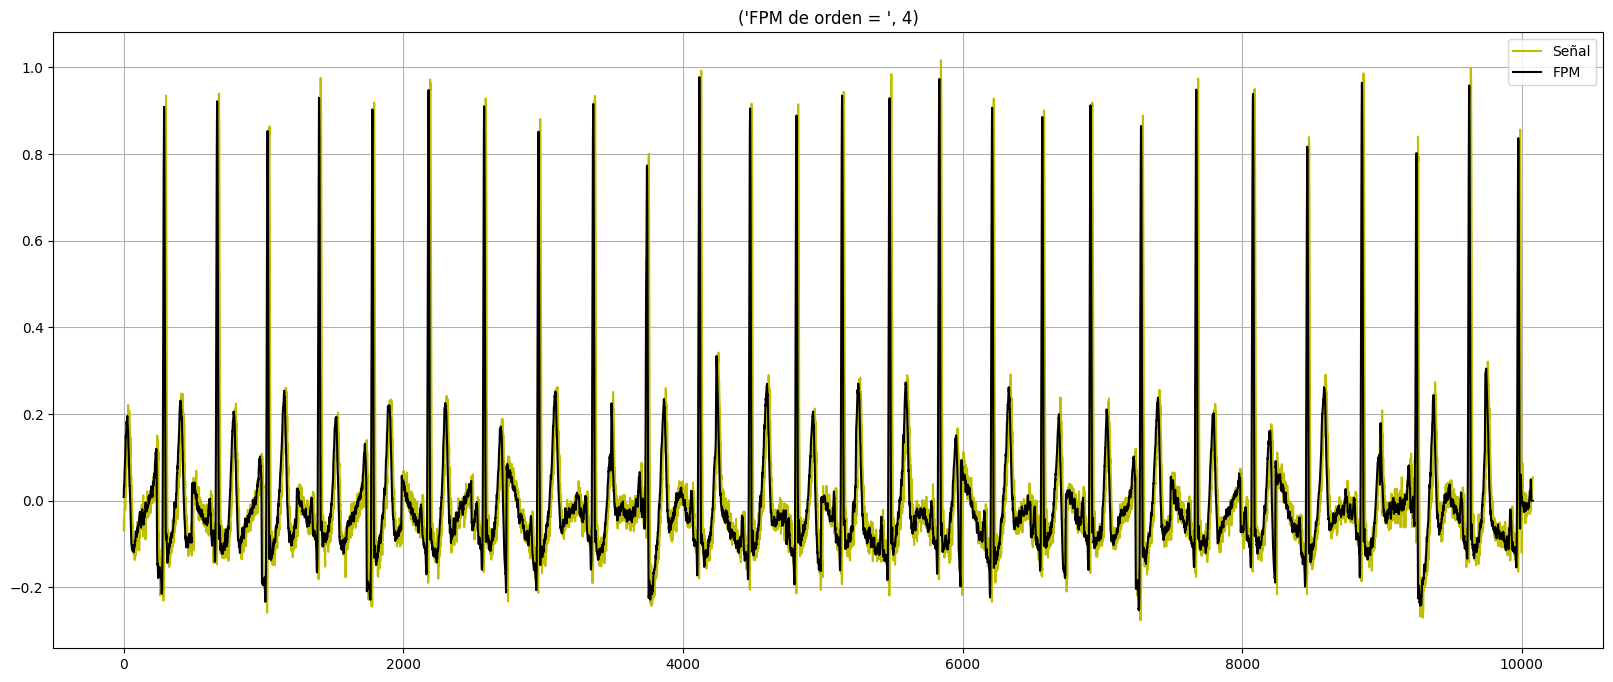

In [39]:
FPM ("/Users/paulaaguirrecarol/Desktop/Copia de ECGFiltroLinea50.acq")

El filtro de orden 2 posee una atenuación de 1.4 y una SNR de 0.7110835742048651 dB.


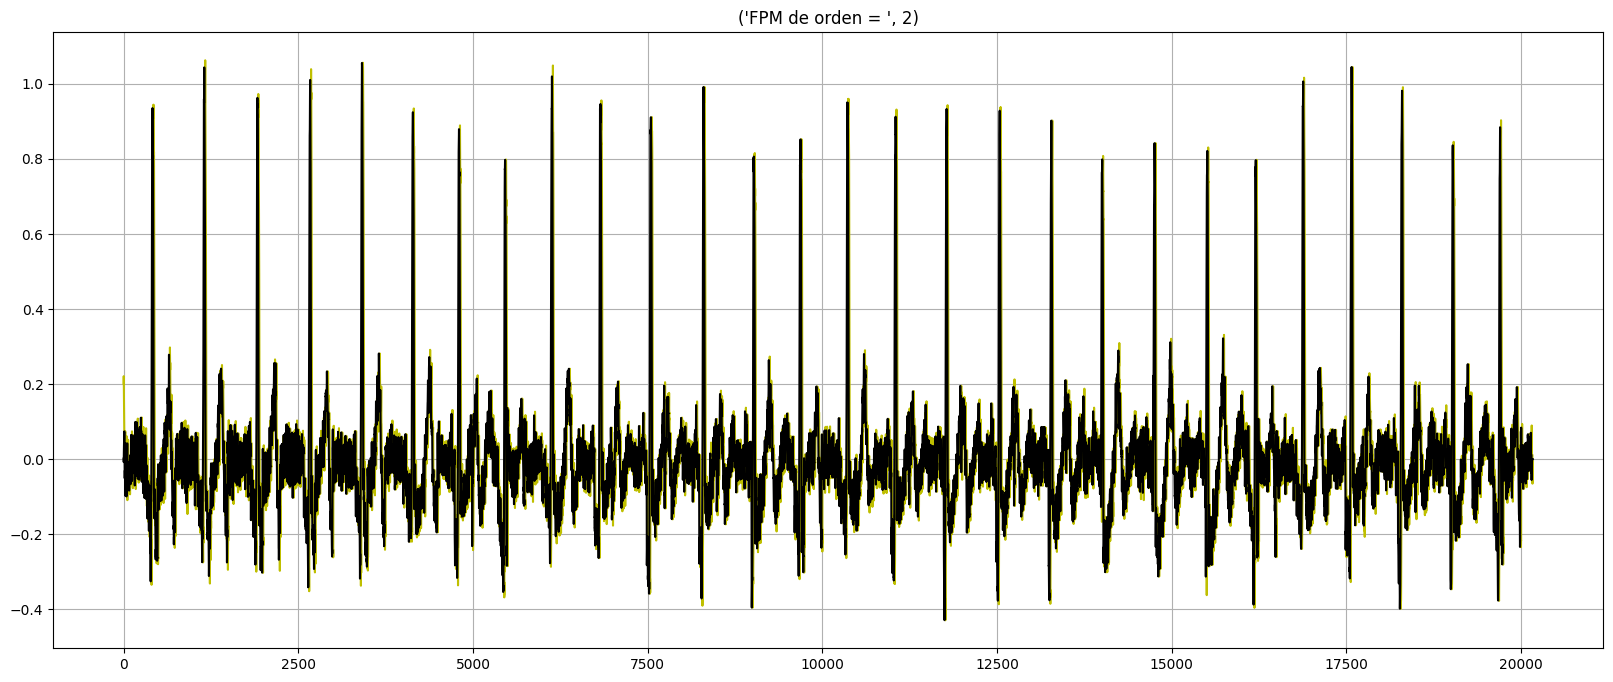

In [37]:
# Leer el archivo de datos
ECG = bioread.read_file ("/Users/paulaaguirrecarol/Desktop/Copia de 2. ecg_sinf.acq")
t = ECG.time_index.T

señal = ECG.channels[0].data
Fs = ECG.channels[0].samples_per_second
N = len(señal)
n = np.arange (N)



# Elimino tendencia -----------------------------------------------------------------------------
A3 = np.arange(0,N,250) #arreglo
B3 = tuple(A3) #tupla
señal_sin_tendencia = signal.detrend(señal,bp=A3)
#------------------------------------------------------------------------------------------------



M = np.arange (2,6,1) #vector de ordenes de los FPM
k = np.arange (0,30,dtype=np.float64)

resp = np.empty ((N,len(M)))

for i,N1 in enumerate (M):
    FPM = np.piecewise (k,(0<=k)&(k<=N1-1),[1/N1,0])
    resp[:,i] = np.convolve (señal_sin_tendencia,FPM,"same")


peaks_max = find_peaks (señal_sin_tendencia,distance=500)[0]
peaks_min = find_peaks (-señal_sin_tendencia,distance=500)[0]

A_max_signal = np.mean (señal_sin_tendencia[peaks_max])
A_min_signal = np.mean (señal_sin_tendencia[peaks_min])

aux_max = np.zeros ((len(M),len(peaks_max)))
aux_min = np.zeros ((len(M),len(peaks_min))) 

for i in range  (len(M)):
    peaks2_max = find_peaks (resp[:,i],distance=500)[0]
    peaks2_min = find_peaks (-resp[:,i],distance=500)[0]
    aux_max [i,:] = resp [peaks2_max,i]
    aux_min [i,:] = resp [peaks2_min,i]
A_max = np.mean (aux_max,axis=1) ; A_min = np.mean (aux_min,axis=1)
A_signal = A_max_signal - A_min_signal ; A_signal_filtr = A_max - A_min
Atenuac = np.round ((A_signal - A_signal_filtr)*100/A_signal,1) #porcentaje de atencuación


max_noise = np.zeros (len(M)) ; min_noise = np.zeros (len(M))
for i in range (len(M)):
    max_noise[i] = max(resp[400:600,i]) #ruido uniforme en toda la señal
    min_noise[i] = min(resp[400:600,i])


A_noise = max_noise - min_noise
SNR = A_signal_filtr / A_noise
SNR_dB = 20*np.log (A_signal_filtr/A_noise)

for i in range (len(M)):
    if (Atenuac[i] < 20)&(SNR_dB[i] == max(SNR_dB)):
        print (f"El filtro de orden {M[i]} posee una atenuación de {Atenuac[i]} y una SNR de {SNR_dB[i]} dB.")
        Mejor_FPM = i

plt.figure(figsize=(20,8))
plt.title (( 'FPM de orden = ', M[Mejor_FPM] ))
plt.plot(n, señal_sin_tendencia,color="y")
plt.plot(n, resp[:,Mejor_FPM],color="k")
plt.grid (True)
plt.show()